## Imports
Importing casual libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [3]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected = True)

Exploring data

In [4]:
data='2.12_Health_systems.csv'
health_data=pd.read_csv(data)

In [5]:
health_data.head(10)

,Country_Region,Province_State,World_Bank_Name,Country_Code,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,AFG,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,ALB,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,DZA,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,AND,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,AGO,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
5,Antigua and Barbuda,NaN,Antigua and Barbuda,ATG,4.3,60.6,32.2,623.1,976.4,0.0,2.8,3.1,14.0,NaN,79.0
6,Argentina,NaN,Argentina,ARG,7.5,74.4,15.8,955.2,1531.0,0.6,4.0,2.6,50.1,100.0,100.0
7,Armenia,NaN,Armenia,ARM,9.9,16.5,80.6,358.8,876.9,1.7,2.9,5.6,86.7,99.3,76.0
8,Australia,NaN,Australia,AUS,9.3,68.3,18.9,5002.4,4529.9,0.0,3.6,12.7,45.1,100.0,100.0
9,Austria,NaN,Austria,AUT,10.4,72.5,18.9,4688.3,5295.2,NaN,5.1,8.2,109.9,100.0,100.0


In [6]:
health_data.describe()

,Province_State,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
count,0.0,185.000000,185.000000,185.000000,185.000000,185.000000,166.000000,183.000000,183.000000,165.000000,157.000000,106.000000
mean,NaN,6.723784,53.092432,32.438378,1042.274595,1418.528108,9.136145,1.728415,4.187432,37.746667,84.250318,89.283962
std,NaN,2.982226,21.883293,19.386548,1715.727311,1692.576635,13.907945,1.581924,4.000303,40.643594,23.398470,18.155089
min,NaN,1.700000,5.100000,0.100000,16.400000,29.900000,0.000000,0.000000,0.100000,0.000000,2.700000,4.000000
25%,NaN,4.500000,37.200000,16.100000,86.300000,228.600000,0.200000,0.300000,1.150000,3.200000,76.900000,85.250000
50%,NaN,6.200000,55.900000,29.700000,327.200000,797.200000,1.700000,1.300000,2.900000,22.300000,96.800000,99.000000
75%,NaN,8.400000,70.800000,44.600000,1063.800000,1891.900000,13.600000,2.850000,6.100000,63.100000,100.000000,100.000000
max,NaN,23.300000,96.000000,81.000000,9869.700000,9869.700000,69.200000,8.200000,20.300000,195.600000,100.000000,100.000000


In [7]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_Region                        169 non-null    object 
 1   Province_State                        0 non-null      float64
 2   World_Bank_Name                       185 non-null    object 
 3   Country_Code                          185 non-null    object 
 4   Health_exp_pct_GDP_2016               185 non-null    float64
 5   Health_exp_public_pct_2016            185 non-null    float64
 6   Health_exp_out_of_pocket_pct_2016     185 non-null    float64
 7   Health_exp_per_capita_USD_2016        185 non-null    float64
 8   per_capita_exp_PPP_2016               185 non-null    float64
 9   External_health_exp_pct_2016          166 non-null    float64
 10  Physicians_per_1000_2009-18           183 non-null    float64
 11  Nurse_midwife_per_1

In [8]:
choromap = go.Figure(data=go.Choropleth(
    locations = health_data['Country_Code'],
    z = health_data['Health_exp_pct_GDP_2016'],
    text =health_data['World_Bank_Name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = 'Level of current health expenditure expressed as a percentage of GDP.'))

choromap.update_layout(
    title_text='Health_exp_pct_GDP_2016',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.kaggle.com/danevans/world-bank-wdi-212-health-systems">\
            World Bank WDI 2.12 - Health Systems</a>',
        showarrow = False
    )]
)
choromap.show()

#iplot(choromap)

In [9]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [10]:
health_nona=health_data[health_data['Health_exp_per_capita_USD_2016'].notnull()]

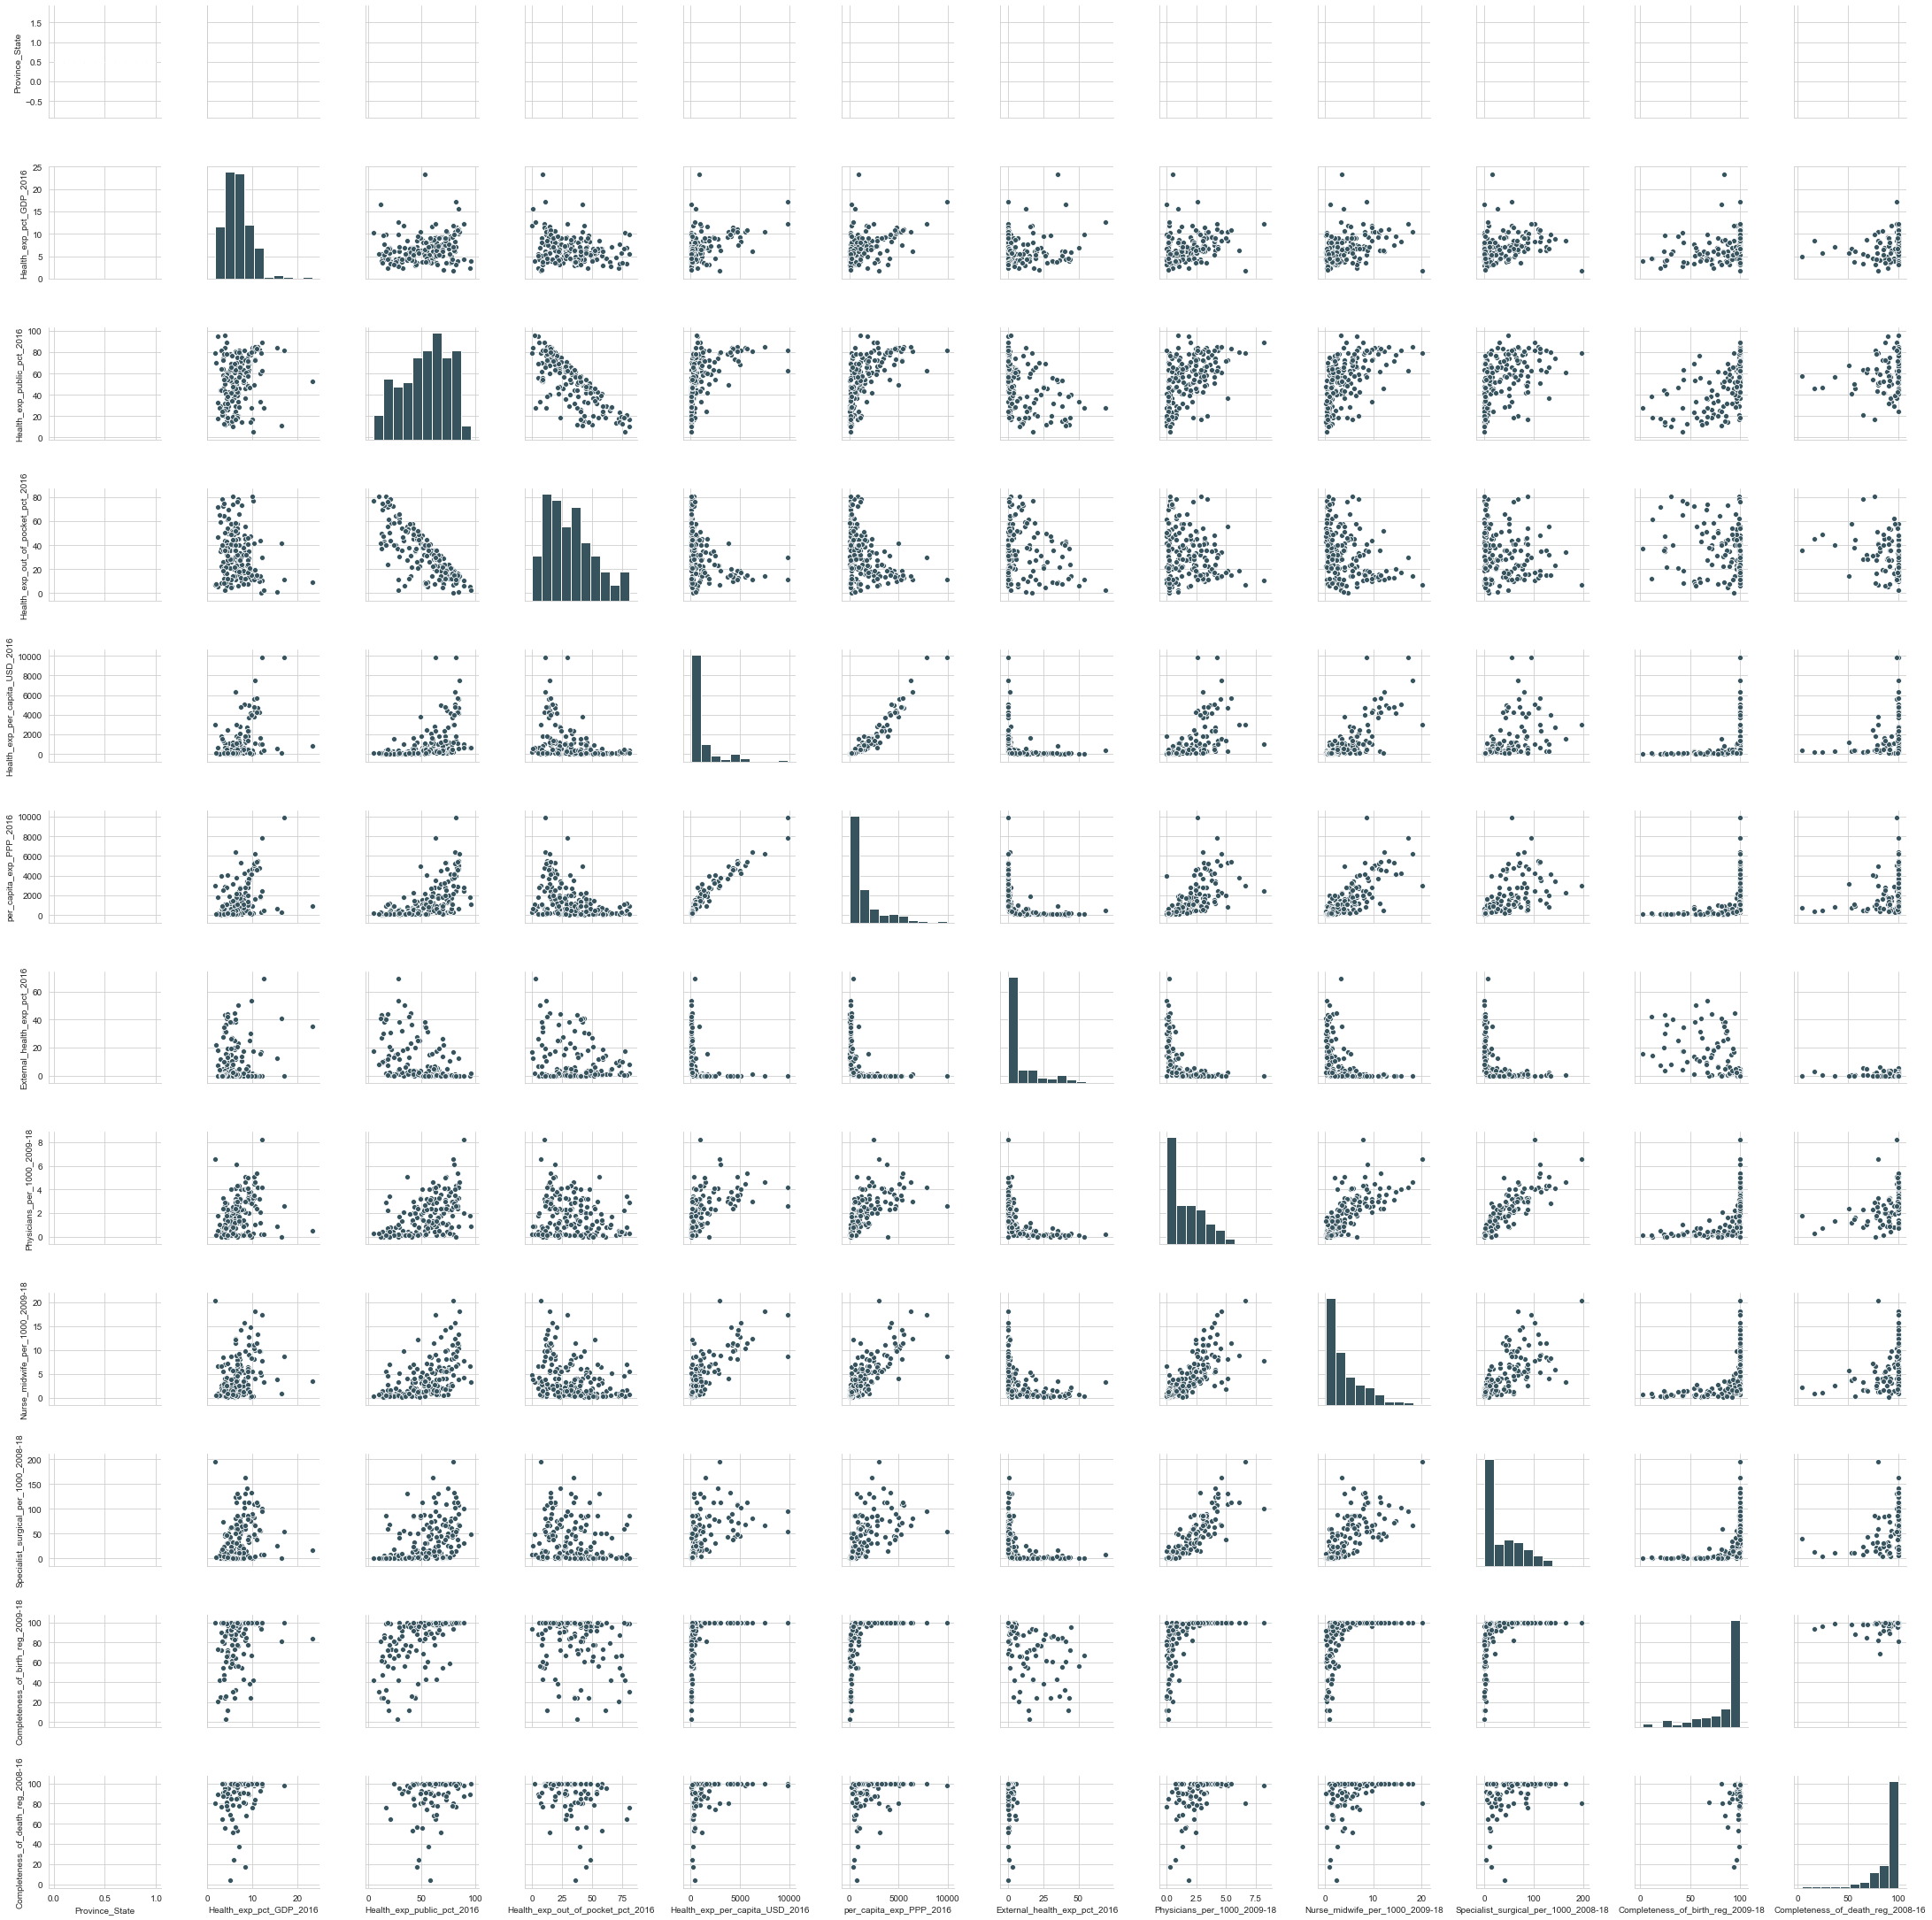

In [11]:
sns.pairplot(health_nona)

In [12]:
health_nona.corr()

,Province_State,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
Province_State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Health_exp_pct_GDP_2016,NaN,1.000000,0.220820,-0.241931,0.467641,0.456003,0.055763,0.310740,0.339116,0.289343,0.288089,0.235194
Health_exp_public_pct_2016,NaN,0.220820,1.000000,-0.770775,0.490091,0.583558,-0.450877,0.537156,0.563260,0.464063,0.571197,0.302864
Health_exp_out_of_pocket_pct_2016,NaN,-0.241931,-0.770775,1.000000,-0.345606,-0.378168,-0.162884,-0.191185,-0.325879,-0.146836,-0.241112,-0.297920
Health_exp_per_capita_USD_2016,NaN,0.467641,0.490091,-0.345606,1.000000,0.957948,-0.304197,0.577419,0.763181,0.509516,0.366110,0.300192
per_capita_exp_PPP_2016,NaN,0.456003,0.583558,-0.378168,0.957948,1.000000,-0.414106,0.662234,0.784615,0.592333,0.461071,0.303981
External_health_exp_pct_2016,NaN,0.055763,-0.450877,-0.162884,-0.304197,-0.414106,1.000000,-0.549753,-0.418062,-0.479593,-0.556949,-0.085150
Physicians_per_1000_2009-18,NaN,0.310740,0.537156,-0.191185,0.577419,0.662234,-0.549753,1.000000,0.749565,0.872781,0.577807,0.391147
Nurse_midwife_per_1000_2009-18,NaN,0.339116,0.563260,-0.325879,0.763181,0.784615,-0.418062,0.749565,1.000000,0.705321,0.497633,0.378073
Specialist_surgical_per_1000_2008-18,NaN,0.289343,0.464063,-0.146836,0.509516,0.592333,-0.479593,0.872781,0.705321,1.000000,0.543365,0.366613


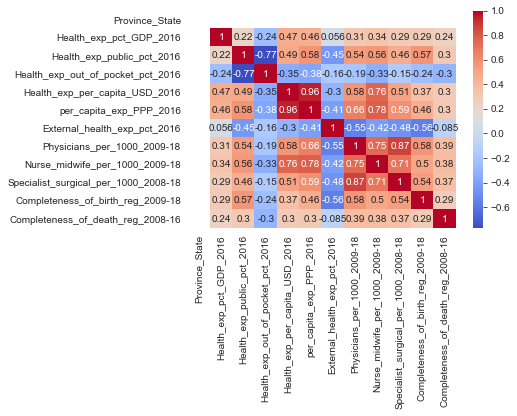

In [13]:
sns.heatmap(health_nona.corr(),cmap='coolwarm',annot=True)

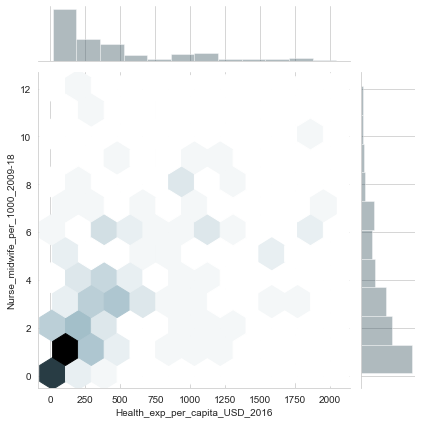

In [14]:
sns.jointplot(x='Health_exp_per_capita_USD_2016',y='Nurse_midwife_per_1000_2009-18',kind='hex',data=health_nona[health_nona["Health_exp_per_capita_USD_2016"]<2300])

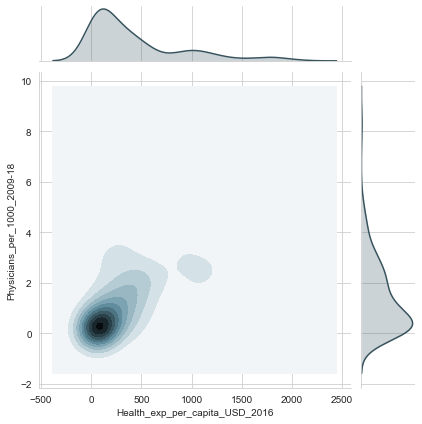

In [15]:
sns.jointplot(x='Health_exp_per_capita_USD_2016',y='Physicians_per_1000_2009-18',kind='kde',data=health_nona[health_nona["Health_exp_per_capita_USD_2016"]<2300])

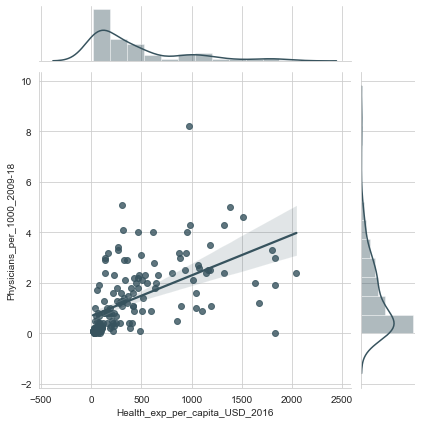

In [16]:
sns.jointplot(x='Health_exp_per_capita_USD_2016',y='Physicians_per_1000_2009-18',kind='reg',data=health_nona[health_nona["Health_exp_per_capita_USD_2016"]<2300])

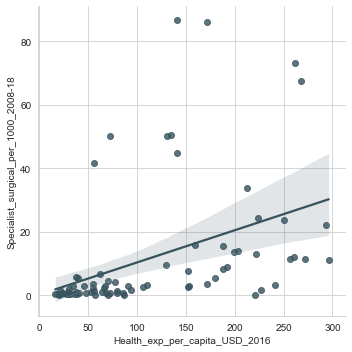

In [17]:
sns.lmplot(x='Health_exp_per_capita_USD_2016',y='Specialist_surgical_per_1000_2008-18', data=health_nona[health_nona["Health_exp_per_capita_USD_2016"]<300])

In [18]:


health_nona=health_nona[health_nona["Health_exp_per_capita_USD_2016"]<750]
health_nona=health_nona[health_nona["Specialist_surgical_per_1000_2008-18"]<20]
X=health_nona[['Health_exp_per_capita_USD_2016','Nurse_midwife_per_1000_2009-18']].fillna(0).values

Y=health_nona['Specialist_surgical_per_1000_2008-18'].fillna(0).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [19]:
X_train

array([[9.390e+01, 1.200e+00],
       [7.040e+01, 1.700e+00],
       [1.294e+02, 2.000e-01],
       [8.550e+01, 7.000e-01],
       [4.194e+02, 5.900e+00],
       [7.930e+01, 1.500e+00],
       [4.028e+02, 2.800e+00],
       [3.170e+01, 4.000e-01],
       [4.154e+02, 1.900e+00],
       [4.282e+02, 3.500e+00],
       [6.760e+01, 9.000e-01],
       [3.615e+02, 4.100e+00],
       [7.990e+01, 1.700e+00],
       [9.130e+01, 1.500e+00],
       [1.923e+02, 1.300e+00],
       [6.620e+01, 1.500e+00],
       [1.882e+02, 1.600e+00],
       [1.880e+02, 4.800e+00],
       [5.520e+01, 5.000e-01],
       [1.098e+02, 1.400e+00],
       [2.960e+01, 3.000e-01],
       [5.720e+01, 3.000e-01],
       [2.750e+01, 8.000e-01],
       [2.980e+01, 4.000e-01],
       [6.270e+01, 2.100e+00],
       [2.032e+02, 3.900e+00],
       [1.850e+01, 7.000e-01],
       [8.630e+01, 1.000e+00],
       [2.271e+02, 1.900e+00],
       [5.531e+02, 3.400e+00],
       [2.962e+02, 1.100e+00],
       [4.810e+01, 8.000e-01],
       [

In [20]:

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = Sequential()
model.add(Dense(2000,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
                
model.add(Dense(1))
model.compile(optimizer= 'rmsprop', loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
earlyStopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=50)

Train on 52 samples, validate on 23 samples
Epoch 1/250
52/52 [==============================] - 5s 98ms/sample - loss: 32.2572 - val_loss: 24.5145
Epoch 2/250
52/52 [==============================] - 2s 35ms/sample - loss: 12.9650 - val_loss: 11.0562
Epoch 3/250
52/52 [==============================] - 2s 36ms/sample - loss: 15.9105 - val_loss: 11.5990
Epoch 4/250
52/52 [==============================] - 1s 28ms/sample - loss: 13.3357 - val_loss: 26.0253
Epoch 5/250
52/52 [==============================] - 2s 32ms/sample - loss: 16.0331 - val_loss: 11.1856
Epoch 6/250
52/52 [==============================] - 2s 45ms/sample - loss: 12.1833 - val_loss: 17.4813
Epoch 7/250
52/52 [==============================] - 2s 41ms/sample - loss: 15.2151 - val_loss: 11.9644
Epoch 8/250
52/52 [==============================] - 1s 28ms/sample - loss: 12.4667 - val_loss: 23.2633
Epoch 9/250
52/52 [==============================] - 1s 23ms/sample - loss: 20.7225 - val_loss: 11.2064
Epoch 10/250
52/52 [

Epoch 79/250
52/52 [==============================] - 1s 21ms/sample - loss: 9.7418 - val_loss: 11.1755
Epoch 80/250
52/52 [==============================] - 1s 22ms/sample - loss: 8.6757 - val_loss: 11.8753
Epoch 81/250
52/52 [==============================] - 1s 22ms/sample - loss: 9.9568 - val_loss: 15.0438
Epoch 82/250
52/52 [==============================] - 1s 22ms/sample - loss: 9.3551 - val_loss: 11.0570
Epoch 83/250
52/52 [==============================] - 1s 26ms/sample - loss: 9.0328 - val_loss: 14.5806
Epoch 84/250
52/52 [==============================] - 1s 24ms/sample - loss: 8.9540 - val_loss: 18.0502
Epoch 85/250
52/52 [==============================] - 1s 23ms/sample - loss: 12.5726 - val_loss: 12.7911
Epoch 86/250
52/52 [==============================] - 1s 20ms/sample - loss: 12.0695 - val_loss: 12.8201
Epoch 87/250
52/52 [==============================] - 1s 20ms/sample - loss: 9.0444 - val_loss: 12.0040
Epoch 88/250
52/52 [==============================] - 1s 19ms/

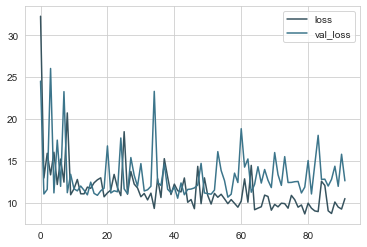

In [23]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test), 
          batch_size=20, 
          epochs=250,
          callbacks=[earlyStopping])
y_predict=model.predict(X_test)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [24]:
y_predict


array([[ 8.390623 ],
       [ 1.5719639],
       [ 0.9014777],
       [ 0.8667393],
       [11.352588 ],
       [ 7.4588633],
       [ 1.2629479],
       [ 1.7879165],
       [ 1.2645019],
       [ 1.075771 ],
       [ 9.449856 ],
       [ 8.74599  ],
       [ 8.541026 ],
       [ 1.6191877],
       [ 1.4451753],
       [ 7.188225 ],
       [11.067948 ],
       [12.989905 ],
       [ 7.030095 ],
       [ 7.470128 ],
       [ 8.343072 ],
       [10.502377 ],
       [ 3.1401312]], dtype=float32)

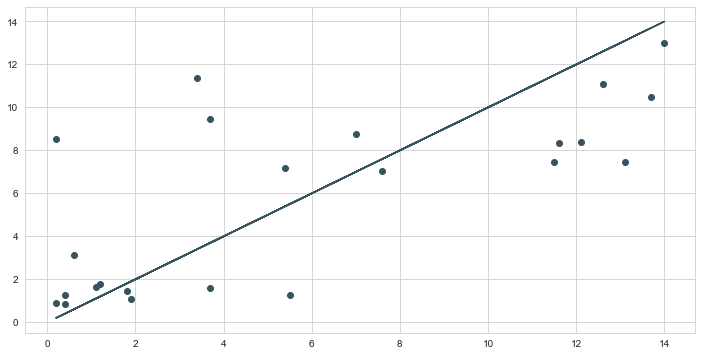

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(y_test,y_predict)
health_nona['Specialist_surgical_per_1000_2008-18'].describe()
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_predict)
plt.plot(y_test,y_test)
